In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('/content/Iris.csv')

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
unique_species = iris['Species'].unique()

In [7]:
for i in range(len(unique_species)):
  iris.replace(unique_species[i],i+1, inplace=True)

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [9]:
iris.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        3
146            6.3           2.5            5.0           1.9        3
147            6.5           3.0            5.2           2.0        3
148            6.2           3.4            5.4           2.3        3
149            5.9           3.0            5.1           1.8        3

[150 rows x 5 columns]>

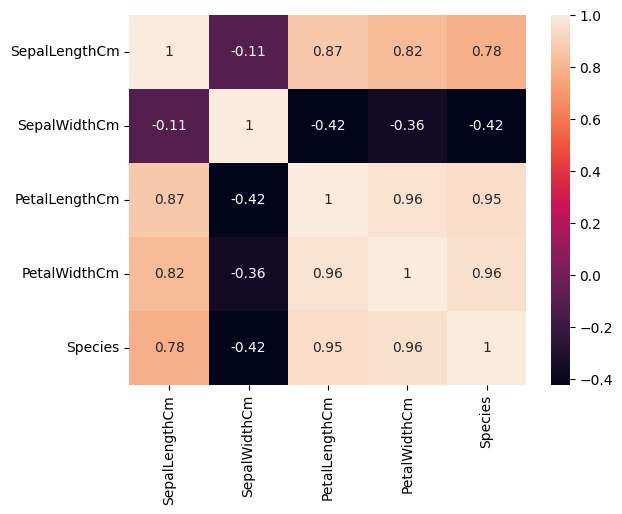

In [10]:
dataplot = sns.heatmap(iris.corr(),annot=True)

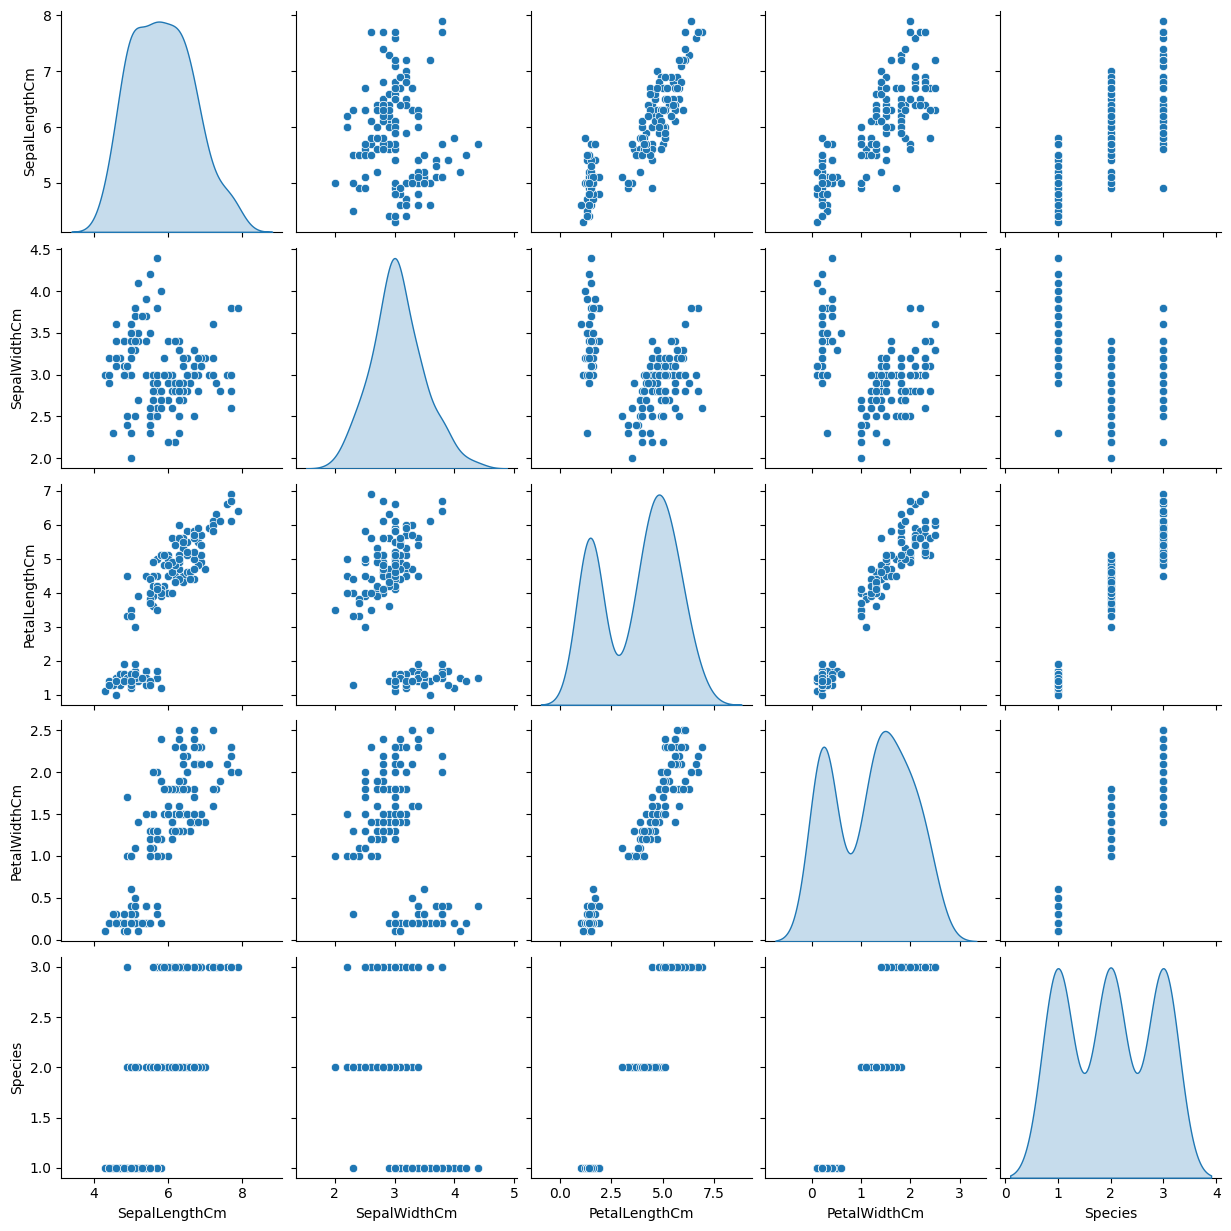

In [11]:
sns.pairplot(iris,diag_kind='kde')

In [12]:
X=iris.drop('Species',axis=1)
Y=iris['Species']
print(X,Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.2)

In [17]:
MLP = MLPClassifier(hidden_layer_sizes=(120,10),max_iter=100)

In [18]:
MLP.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(120, 10), max_iter=100)

In [20]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

Y_predict = MLP.predict(X_test)
accuray = accuracy_score(Y_predict, Y_test)
f1 = f1_score(Y_predict, Y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
F1 Score: 0.9669683257918552


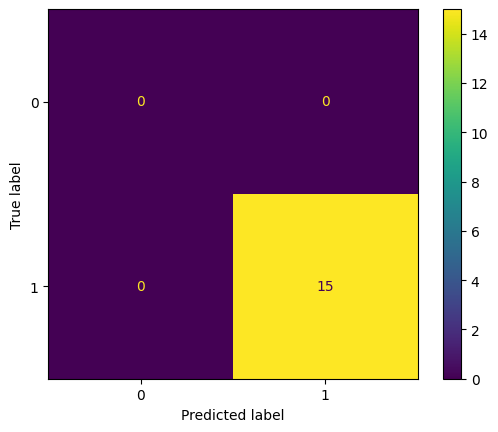

In [21]:
labels = [0,1]
cm = confusion_matrix(Y_test, Y_predict, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

True Positives (0): Correctly predicted positives.

False Negatives (0): Positives missed by the model.

False Positives (0): Incorrectly predicted positives.

True Negatives (15): Correctly predicted negatives.